# Feature Scaling
Feature scaling is a method used to convert the data into equal range(different units into one unit). Following techniques of feature scaling used in this notebook.

- Standardization(or z-score normalization). Data in range (-3,3)
- Normalization(or Min-Max Scaler). Data in range (0,1)
- MaxAbs Scaler. Data in range (-1,1)
- Robust Scaler. Also handle outliers in best manner

### Which one is best and mostly used?
- If algorithm able to handle -ve and +ve both values, then use StandardScaler
- If algorithm able to handle only +ve values, then use MinMaxScaler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

## 1. Standardization(or z-score normalization)

In [2]:
# create dummy dataset
df = pd.DataFrame({
    "Age":[12,14,15,17,1],
    "Height":[122,134,136,144,129],
    "Weight":[23,33,29,31,21]
})
df

,Age,Height,Weight
0,12,122,23
1,14,134,33
2,15,136,29
3,17,144,31
4,1,129,21


In [5]:
df.describe()

,Age,Height,Weight
count,5.000000,5.000000,5.000000
mean,11.800000,133.000000,27.400000
std,6.300794,8.185353,5.176872
min,1.000000,122.000000,21.000000
25%,12.000000,129.000000,23.000000
50%,14.000000,134.000000,29.000000
75%,15.000000,136.000000,31.000000
max,17.000000,144.000000,33.000000


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 0.03548867, -1.5024855 , -0.95025527],
       [ 0.39037539,  0.13658959,  1.2094158 ],
       [ 0.56781875,  0.40976877,  0.34554737],
       [ 0.92270547,  1.5024855 ,  0.77748158],
       [-1.91638829, -0.54635836, -1.38218948]])

In [8]:
# convert scaled array into dataset
df2 = pd.DataFrame(scaled_df, columns=df.columns)
df2

,Age,Height,Weight
0,0.035489,-1.502486,-0.950255
1,0.390375,0.136590,1.209416
2,0.567819,0.409769,0.345547
3,0.922705,1.502486,0.777482
4,-1.916388,-0.546358,-1.382189


In [9]:
df2.describe()

,Age,Height,Weight
count,5.000000e+00,5.000000,5.000000e+00
mean,-1.332268e-16,0.000000,3.108624e-16
std,1.118034e+00,1.118034,1.118034e+00
min,-1.916388e+00,-1.502486,-1.382189e+00
25%,3.548867e-02,-0.546358,-9.502553e-01
50%,3.903754e-01,0.136590,3.455474e-01
75%,5.678188e-01,0.409769,7.774816e-01
max,9.227055e-01,1.502486,1.209416e+00


In [10]:
df,df2

(   Age  Height  Weight
 0   12     122      23
 1   14     134      33
 2   15     136      29
 3   17     144      31
 4    1     129      21,
         Age    Height    Weight
 0  0.035489 -1.502486 -0.950255
 1  0.390375  0.136590  1.209416
 2  0.567819  0.409769  0.345547
 3  0.922705  1.502486  0.777482
 4 -1.916388 -0.546358 -1.382189)

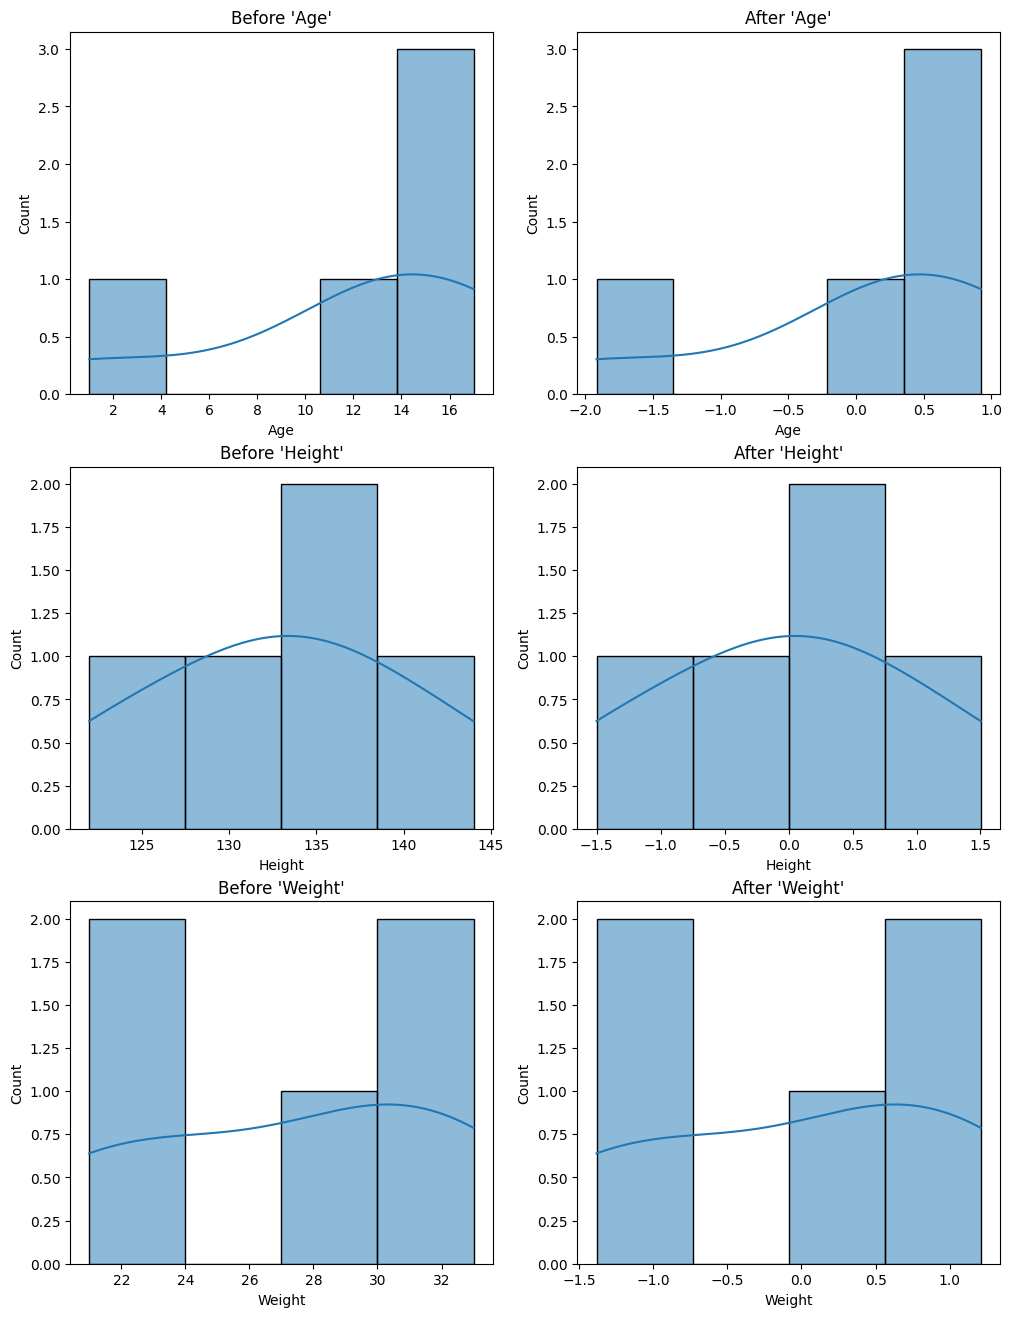

In [11]:
# visualize for satisfaction because there is no change in real shape of data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

sns.histplot(x=df["Age"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Before 'Age'")
sns.histplot(x=df2["Age"], kde=True, ax=axes[0,1])
axes[0,1].set_title("After 'Age'")

sns.histplot(x=df["Height"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Before 'Height'")
sns.histplot(x=df2["Height"], kde=True, ax=axes[1,1])
axes[1,1].set_title("After 'Height'")

sns.histplot(x=df["Weight"], kde=True, ax=axes[2,0])
axes[2,0].set_title("Before 'Weight'")
sns.histplot(x=df2["Weight"], kde=True, ax=axes[2,1])
axes[2,1].set_title("After 'Weight'")
plt.show()

## 2. Min-Max Scaler

In [12]:
# create dummy dataset
df = pd.DataFrame({
    "Age":[12,14,15,17,1],
    "Height":[122,134,136,144,129],
    "Weight":[23,33,29,31,21]
})
# use scaler
scaler = MinMaxScaler()
# scaling
scaled_df = scaler.fit_transform(df)
# converting array to dataframe
df2 = pd.DataFrame(scaled_df, columns=df.columns)
df,df2

(   Age  Height  Weight
 0   12     122      23
 1   14     134      33
 2   15     136      29
 3   17     144      31
 4    1     129      21,
       Age    Height    Weight
 0  0.6875  0.000000  0.166667
 1  0.8125  0.545455  1.000000
 2  0.8750  0.636364  0.666667
 3  1.0000  1.000000  0.833333
 4  0.0000  0.318182  0.000000)

In [13]:
df2.describe()

,Age,Height,Weight
count,5.0000,5.000000,5.000000
mean,0.6750,0.500000,0.533333
std,0.3938,0.372061,0.431406
min,0.0000,0.000000,0.000000
25%,0.6875,0.318182,0.166667
50%,0.8125,0.545455,0.666667
75%,0.8750,0.636364,0.833333
max,1.0000,1.000000,1.000000


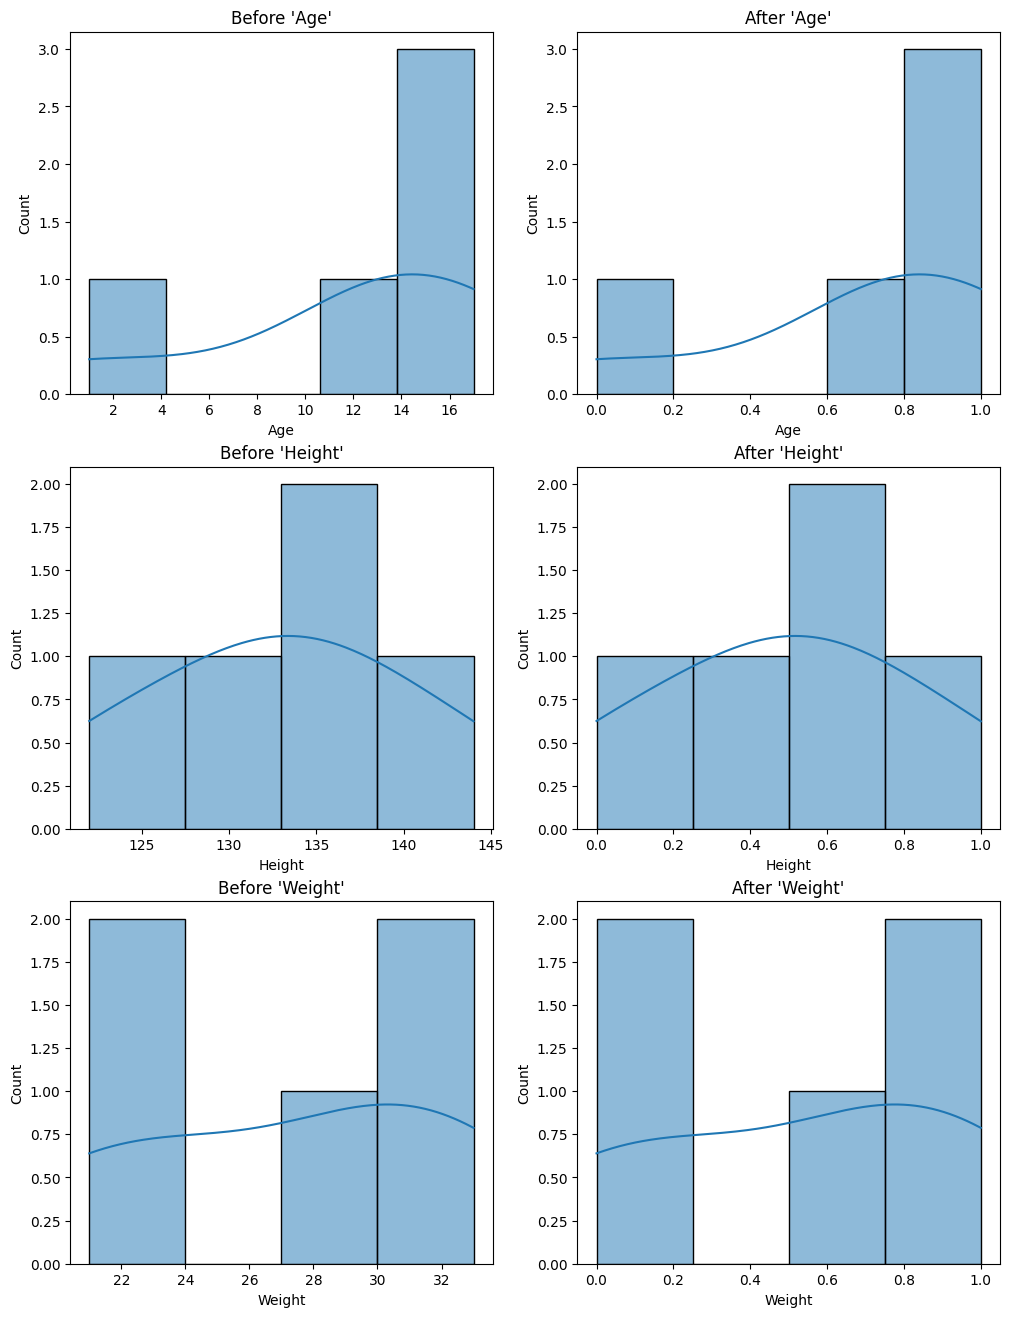

In [14]:
# visualize for satisfaction because there is no change in real shape of data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

sns.histplot(x=df["Age"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Before 'Age'")
sns.histplot(x=df2["Age"], kde=True, ax=axes[0,1])
axes[0,1].set_title("After 'Age'")

sns.histplot(x=df["Height"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Before 'Height'")
sns.histplot(x=df2["Height"], kde=True, ax=axes[1,1])
axes[1,1].set_title("After 'Height'")

sns.histplot(x=df["Weight"], kde=True, ax=axes[2,0])
axes[2,0].set_title("Before 'Weight'")
sns.histplot(x=df2["Weight"], kde=True, ax=axes[2,1])
axes[2,1].set_title("After 'Weight'")
plt.show()

## 3. MaxAbs Scaler

In [15]:
# create dummy dataset
df = pd.DataFrame({
    "Age":[12,14,15,17,1],
    "Height":[122,134,136,144,129],
    "Weight":[23,33,29,31,21]
})
# use scaler
scaler = MaxAbsScaler()
# scaling
scaled_df = scaler.fit_transform(df)
# converting array to dataframe
df2 = pd.DataFrame(scaled_df, columns=df.columns)
df,df2

(   Age  Height  Weight
 0   12     122      23
 1   14     134      33
 2   15     136      29
 3   17     144      31
 4    1     129      21,
         Age    Height    Weight
 0  0.705882  0.847222  0.696970
 1  0.823529  0.930556  1.000000
 2  0.882353  0.944444  0.878788
 3  1.000000  1.000000  0.939394
 4  0.058824  0.895833  0.636364)

In [16]:
df2.describe()

,Age,Height,Weight
count,5.000000,5.000000,5.000000
mean,0.694118,0.923611,0.830303
std,0.370635,0.056843,0.156875
min,0.058824,0.847222,0.636364
25%,0.705882,0.895833,0.696970
50%,0.823529,0.930556,0.878788
75%,0.882353,0.944444,0.939394
max,1.000000,1.000000,1.000000


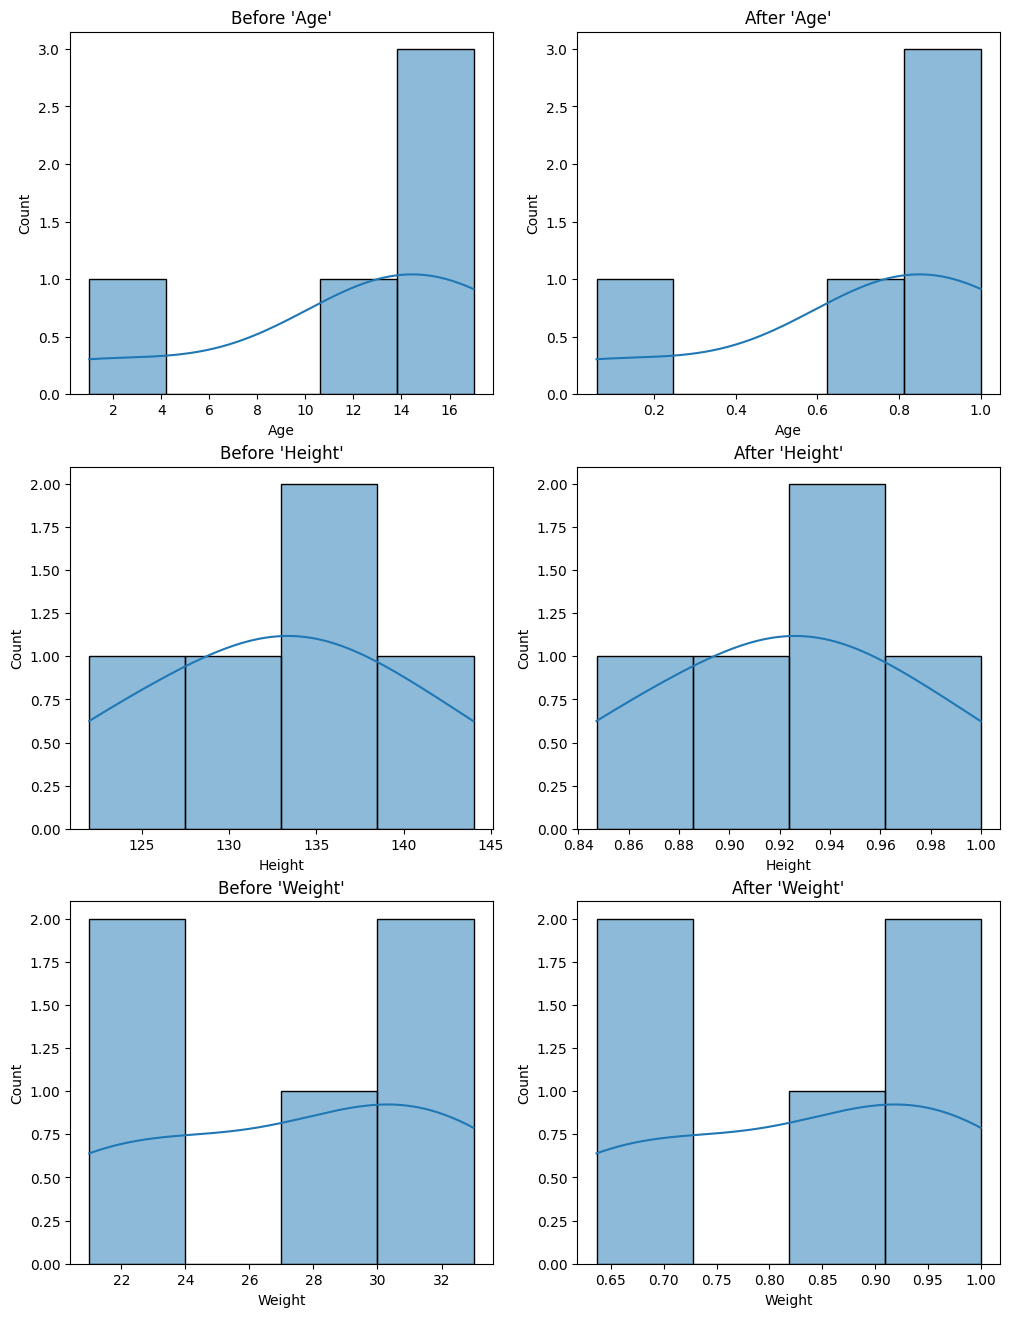

In [17]:
# visualize for satisfaction because there is no change in real shape of data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

sns.histplot(x=df["Age"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Before 'Age'")
sns.histplot(x=df2["Age"], kde=True, ax=axes[0,1])
axes[0,1].set_title("After 'Age'")

sns.histplot(x=df["Height"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Before 'Height'")
sns.histplot(x=df2["Height"], kde=True, ax=axes[1,1])
axes[1,1].set_title("After 'Height'")

sns.histplot(x=df["Weight"], kde=True, ax=axes[2,0])
axes[2,0].set_title("Before 'Weight'")
sns.histplot(x=df2["Weight"], kde=True, ax=axes[2,1])
axes[2,1].set_title("After 'Weight'")
plt.show()

## 4. Robust Scaler

In [18]:
# create dummy dataset
df = pd.DataFrame({
    "Age":[12,14,15,17,1],
    "Height":[122,134,136,144,129],
    "Weight":[23,33,29,31,21]
})
# use scaler
scaler = RobustScaler()
# scaling
scaled_df = scaler.fit_transform(df)
# converting array to dataframe
df2 = pd.DataFrame(scaled_df, columns=df.columns)
df,df2

(   Age  Height  Weight
 0   12     122      23
 1   14     134      33
 2   15     136      29
 3   17     144      31
 4    1     129      21,
         Age    Height  Weight
 0 -0.666667 -1.714286   -0.75
 1  0.000000  0.000000    0.50
 2  0.333333  0.285714    0.00
 3  1.000000  1.428571    0.25
 4 -4.333333 -0.714286   -1.00)

In [19]:
df2.describe()

,Age,Height,Weight
count,5.000000,5.000000,5.000000
mean,-0.733333,-0.142857,-0.200000
std,2.100265,1.169336,0.647109
min,-4.333333,-1.714286,-1.000000
25%,-0.666667,-0.714286,-0.750000
50%,0.000000,0.000000,0.000000
75%,0.333333,0.285714,0.250000
max,1.000000,1.428571,0.500000


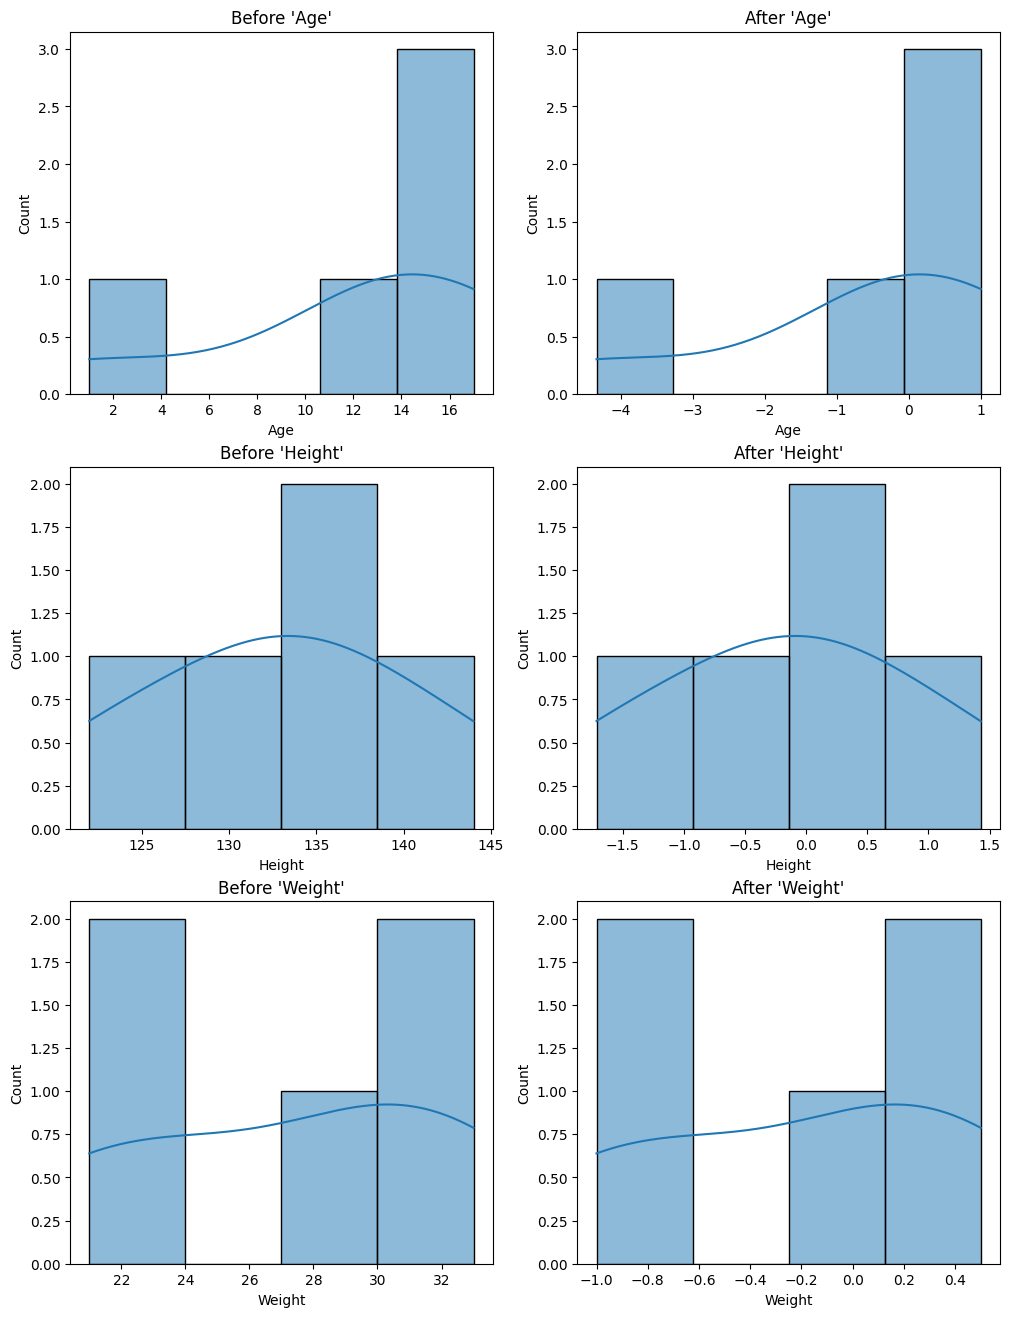

In [20]:
# visualize for satisfaction because there is no change in real shape of data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

sns.histplot(x=df["Age"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Before 'Age'")
sns.histplot(x=df2["Age"], kde=True, ax=axes[0,1])
axes[0,1].set_title("After 'Age'")

sns.histplot(x=df["Height"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Before 'Height'")
sns.histplot(x=df2["Height"], kde=True, ax=axes[1,1])
axes[1,1].set_title("After 'Height'")

sns.histplot(x=df["Weight"], kde=True, ax=axes[2,0])
axes[2,0].set_title("Before 'Weight'")
sns.histplot(x=df2["Weight"], kde=True, ax=axes[2,1])
axes[2,1].set_title("After 'Weight'")
plt.show()

# Conclusion:

We scale the data using `Standardization, MinMaxScaler, MaxAbsScaler, RobustScaler`, but we see there is no change in data distribution. So, scaling only give benefit to convert dataframe into equal units or range.